In [1]:
import numpy as np
import matplotlib.pyplot as plt
import irf
from irf.ensemble import wrf as rfc
from irf.utils import (
    get_prevalent_interactions,
    visualize_impurity_decrease,
    visualize_prevalent_interactions,
    get_filtered_feature_paths
)
import rpy2.robjects as robjects
from irf.irf_jupyter_utils import draw_tree

# Simulate the settings in the signed iRF paper

## Simulation 1: and rule

In [2]:
def load_data(i=0):
    robjects.r['load']("../../signediRF/data/gaussSim_and.Rdata")
    X = np.array(robjects.r['data'][i])[:-5000].reshape((50, 5000)).T
    y = np.array(robjects.r['data'][i])[-5000:]
    return X, y

In [3]:
X, y = load_data(42)

In [4]:
rf = rfc()

In [5]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

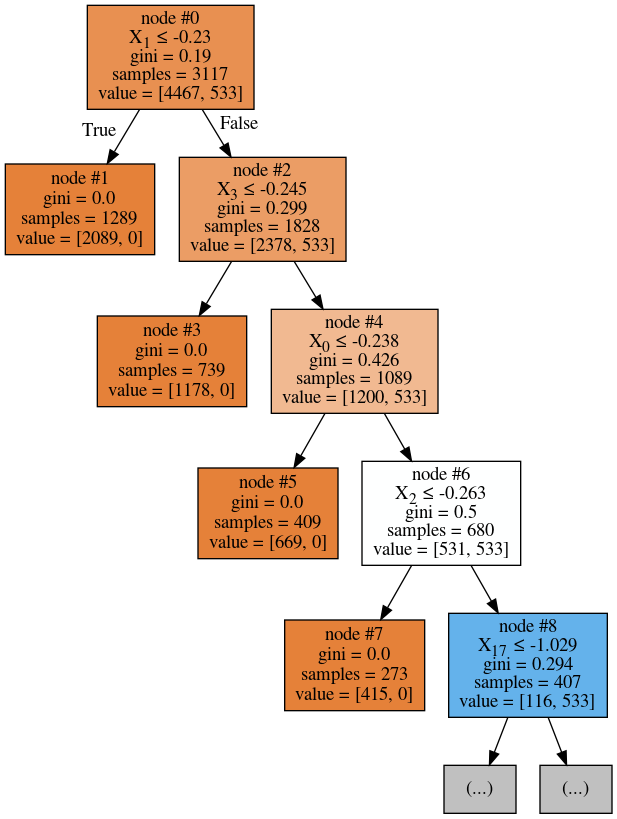

In [6]:
draw_tree(rf.estimators_[0], max_depth=4)

<BarContainer object of 50 artists>

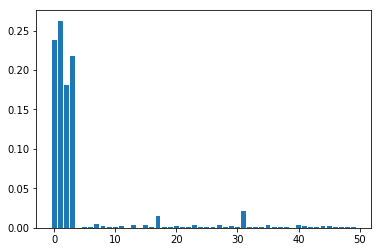

In [7]:
plt.bar(np.arange(50), rf.feature_importances_)

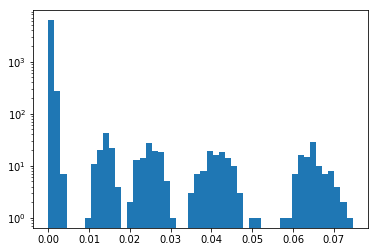

In [8]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [9]:
rf.n_paths

7268

In [13]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(
    rf,
    impurity_decrease_threshold=0.005,
    min_support=500,
    signed=True,
    weight_scheme="samplesize",
)

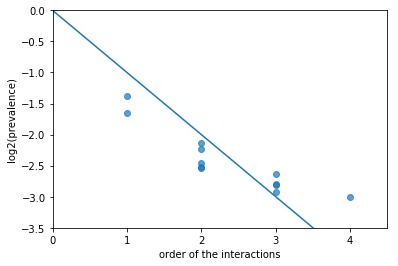

In [14]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [15]:
list(prevalence.items())[:20]

[(((0, 'R'), (1, 'R'), (2, 'R'), (3, 'R')), 0.124968000000005),
 (((0, 'R'), (2, 'R'), (3, 'R')), 0.16156000000000742),
 (((1, 'R'), (2, 'R'), (3, 'R')), 0.14356000000000627),
 (((0, 'R'), (1, 'R'), (2, 'R')), 0.141720000000006),
 (((0, 'R'), (1, 'R'), (3, 'R')), 0.1323280000000057),
 (((2, 'R'), (3, 'R')), 0.2264740000000101),
 (((0, 'R'), (2, 'R')), 0.2133380000000096),
 (((1, 'R'), (2, 'R')), 0.1824120000000079),
 (((0, 'R'), (3, 'R')), 0.17318400000000808),
 (((1, 'R'), (3, 'R')), 0.17180400000000778),
 (((2, 'R'),), 0.3857360000000183),
 (((3, 'R'),), 0.31910200000001643)]

## Simulation 2: OR rule

In [16]:
def load_data(i=0):
    robjects.r['load']("../../signediRF/data/gaussSim_or.Rdata")
    X = np.array(robjects.r['data'][i])[:-5000].reshape((50, 5000)).T
    y = np.array(robjects.r['data'][i])[-5000:]
    return X, y

In [17]:
X, y = load_data(10)

In [18]:
rf = rfc()

In [19]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

<BarContainer object of 50 artists>

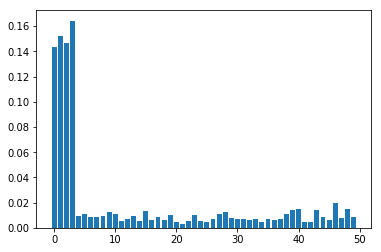

In [20]:
plt.bar(np.arange(50), rf.feature_importances_)

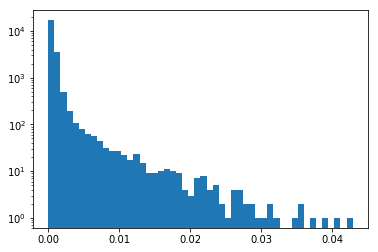

In [21]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [22]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(
    rf,
    impurity_decrease_threshold=1e-3,
    min_support=500,
    signed=True,
    weight_scheme="samplesize",
)

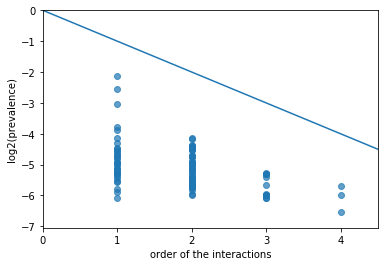

In [23]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [24]:
#visualize find out the most prevalent interactions
list(prevalence.items())

[(((0, 'R'), (1, 'R'), (2, 'L'), (3, 'L')), 0.01913400000000002),
 (((4, 'R'), (27, 'L'), (43, 'R'), (48, 'L')), 0.015660000000000045),
 (((0, 'L'), (1, 'L'), (2, 'R'), (3, 'R')), 0.01068000000000002),
 (((0, 'R'), (2, 'L'), (3, 'L')), 0.026015999999999883),
 (((0, 'R'), (1, 'R'), (2, 'L')), 0.025455999999999857),
 (((0, 'R'), (1, 'R'), (3, 'L')), 0.02535799999999991),
 (((1, 'R'), (2, 'L'), (3, 'L')), 0.025233999999999906),
 (((1, 'L'), (2, 'R'), (3, 'R')), 0.02354799999999996),
 (((27, 'L'), (43, 'R'), (48, 'L')), 0.019696),
 (((0, 'L'), (1, 'L'), (2, 'R')), 0.016060000000000074),
 (((4, 'R'), (43, 'R'), (48, 'L')), 0.015880000000000047),
 (((4, 'R'), (27, 'L'), (48, 'L')), 0.015670000000000045),
 (((4, 'R'), (27, 'L'), (43, 'R')), 0.015660000000000045),
 (((0, 'L'), (2, 'R'), (3, 'R')), 0.01470800000000006),
 (((0, 'L'), (1, 'L'), (3, 'R')), 0.014682000000000068),
 (((0, 'R'), (46, 'R')), 0.05635399999999998),
 (((43, 'R'), (48, 'L')), 0.055352000000000026),
 (((0, 'R'),), 0.2288480

## Simulation 3: Add rule

In [25]:
def load_data(i=0):
    robjects.r['load']("../../signediRF/data/gaussSim_add.Rdata")
    X = np.array(robjects.r['data'][i])[:-5000].reshape((50, 5000)).T
    y = np.array(robjects.r['data'][i])[-5000:]
    return X, y

In [26]:
X, y = load_data(49)

In [27]:
rf = rfc()

In [28]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

<BarContainer object of 50 artists>

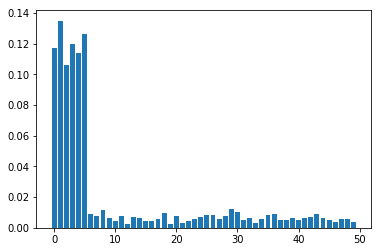

In [29]:
plt.bar(np.arange(50), rf.feature_importances_)

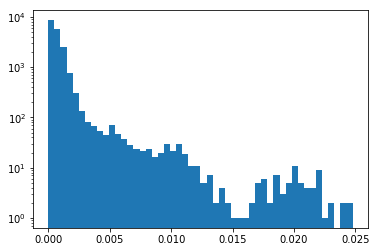

In [30]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [31]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(
    rf,
    impurity_decrease_threshold=0.001,
    min_support=2000,
    signed=True,
    weight_scheme="samplesize",
)

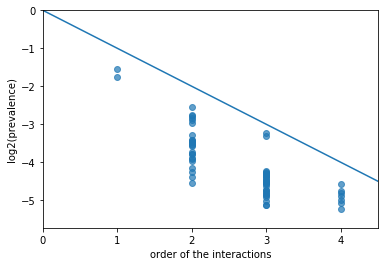

In [32]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [33]:
#visualize find out the most prevalent interactions
list(prevalence.items())[:20]

[(((0, 'R'), (1, 'R'), (2, 'R')), 0.10735400000000506),
 (((3, 'R'), (4, 'R'), (5, 'R')), 0.10162000000000432),
 (((1, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.042158000000000015),
 (((2, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.036891999999999925),
 (((0, 'R'), (1, 'R'), (2, 'R'), (4, 'L')), 0.03540199999999979),
 (((2, 'R'), (3, 'R'), (4, 'R'), (5, 'R')), 0.03366999999999968),
 (((0, 'L'), (3, 'R'), (4, 'R'), (5, 'R')), 0.031083999999999626),
 (((0, 'R'), (1, 'R'), (2, 'R'), (3, 'R')), 0.029565999999999707),
 (((0, 'R'), (2, 'R')), 0.1709680000000099),
 (((0, 'R'), (1, 'R'), (2, 'R'), (4, 'R')), 0.026657999999999796),
 (((1, 'R'), (2, 'R')), 0.14762000000000833),
 (((4, 'R'), (5, 'R')), 0.14546800000000762),
 (((1, 'L'), (4, 'R'), (5, 'R')), 0.05353200000000013),
 (((3, 'R'), (4, 'R')), 0.1398940000000078),
 (((0, 'R'), (2, 'R'), (4, 'L')), 0.052120000000000166),
 (((2, 'L'), (3, 'R'), (4, 'R')), 0.05083400000000021),
 (((1, 'L'), (3, 'R'), (5, 'R')), 0.05059200000000013),
 (((3, 'R'), (